# Ejemplo 4. Valores y vectores propios 

**Si el tensor de esfuerzos en un punto $P$, en el sistema de referencia $X,Y,Z$ está definidido por:**

$$\begin{align*}
\\
&\sigma_{xx} = 200\dfrac{kgf}{cm^2}; \;\;\; \sigma_{yy} =0\dfrac{kgf}{cm^2}; \;\;\; \sigma_{zz} = 0\dfrac{kgf}{cm^2} \\\\
&\tau_{xy} = \tau_{yx} =100\dfrac{kgf}{cm^2}, \;\;\; \tau_{xz} = \tau_{zx} =300\dfrac{kgf}{cm^2}; \;\;\;\tau_{yz} = \tau_{zy} = 0 \dfrac{kgf}{cm^2}\\\\
\end{align*}$$

* Determine los valores y direccionees principales:

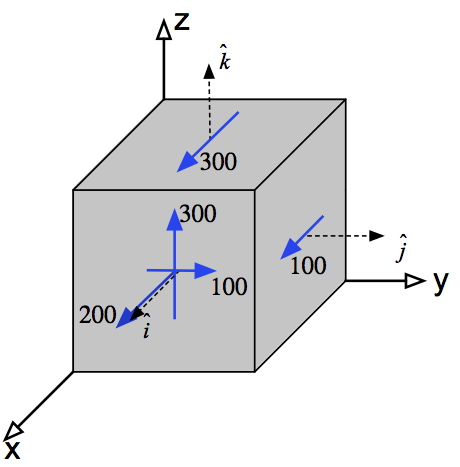

In [1]:
from IPython.display import Image,Latex
#Image()
Image(filename='FIGURES/Sorigen.png',width=400)

## Solución:

Inicialmente encontremos los valores principales $(\lambda)$ a partir de la solución del polinomio característico: 

${\lambda ^3} - {I_\sigma}{\lambda ^2} + {II_\sigma}\lambda  - {III_\sigma} = 0$

Donde ${I_\sigma}$, ${II_\sigma}$ y ${III_\sigma}$ son los invariantes 1, 2 y 3 respectivamente que están dados por: 

${I_\sigma } = {\sigma _{xx}} + {\sigma _{yy}} + {\sigma _{zz}}$

${II_\sigma } = {\sigma _{xx}}{\sigma _{yy}} + {\sigma _{xx}}{\sigma _{zz}} + {\sigma _{zz}}{\sigma _{yy}} - \tau _{xy}^2 - \tau _{xz}^2 - \tau _{yz}^2$

${III_\sigma } = {\sigma _{xx}}{\sigma _{yy}}{\sigma _{zz}} + 2{\tau _{xy}}{\tau _{xz}}{\tau _{yz}} - {\sigma _{xx}}\tau _{yz}^2 - {\sigma _{yy}}\tau _{xz}^2 - {\sigma _{zz}}\tau _{xy}^2$

In [2]:
import numpy as np
from scipy import linalg

S = np.array([
    [200,100,300.],
    [100,0,0],
    [300,0,0]])

IS   = S[0,0]+S[1,1]+S[2,2]
IIS  = S[0,0]*S[1,1]+S[1,1]*S[2,2]+S[0,0]*S[2,2]-(S[0,1]**2)-(S[0,2]**2)-(S[1,2]**2)
IIIS = S[0,0]*S[1,1]*S[2,2]-S[0,0]*(S[1,2]**2)-S[1,1]*(S[0,2]**2)-S[2,2]*(S[0,1]**2)+2*S[1,2]*S[0,2]*S[0,1]
print
print 'Invariantes:', IS,IIS,IIIS
print 


Invariantes: 200.0 -100000.0 0.0



Resolviendo vía polinomio característico:

In [3]:
coeff=[1.0,-IS,IIS,-IIIS]
ps=np.roots(coeff)

print
print "Esfuerzos principales:", np.sort(np.round(ps,1))
print


Esfuerzos principales: [-231.7    0.   431.7]



Resolviendo vía librerías python con linalg.eig podemos encontrar valores (la) y direcciones principales (n) simultaneamente


In [4]:
la, n= linalg.eigh(S)
la = la.real
print
print "Esfuerzos principales:", np.round(la,1)
print
#print S


Esfuerzos principales: [-231.7    0.   431.7]



In [5]:
print 
print 'n=', np.round(n,2)
print 


n= [[ 0.59  0.    0.81]
 [-0.26 -0.95  0.19]
 [-0.77  0.32  0.56]]




De esta manera escribamos en tensor asociado a las direcciones principales: 


Sp = [[-231.7    0.     0. ]
 [   0.     0.     0. ]
 [   0.     0.   431.7]]



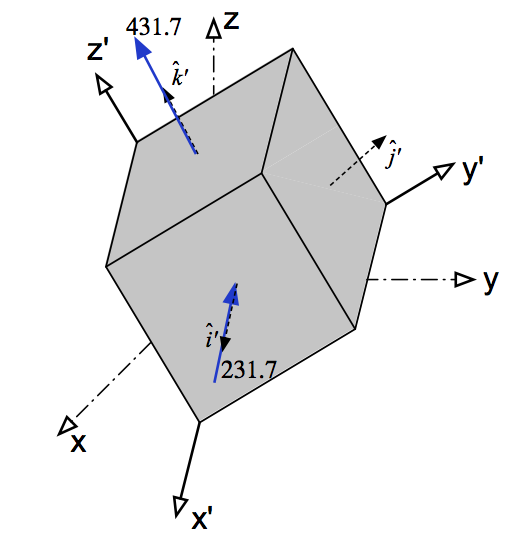

In [6]:
print
Sp = np.array([
    [la[0],0,0],
    [0,la[1],0],
    [0,0,la[2]]])
print 'Sp =',np.round(Sp,1)
print
Image(filename='FIGURES/Sprinc.png',width=400)

Los vectores $i'$, $j'$ y $k'$ están dados por:

In [7]:
print "i'=", np.round(n[:,0],2)
print "j'=", np.round(n[:,1],2)
print "k'=", np.round(n[:,2],2)
print

i'= [ 0.59 -0.26 -0.77]
j'= [ 0.   -0.95  0.32]
k'= [ 0.81  0.19  0.56]




Verifiquemos que se cumplen los invariantes en el tensor asociado a direcciones principales:

In [8]:
IS  = Sp[0,0]+Sp[1,1]+Sp[2,2]
IIS  =Sp[0,0]*Sp[1,1]+Sp[1,1]*Sp[2,2]+Sp[0,0]*Sp[2,2]-(Sp[0,1]**2)-(Sp[0,2]**2)-(Sp[1,2]**2)
IIIS =Sp[0,0]*Sp[1,1]*Sp[2,2]-Sp[0,0]*(Sp[1,2]**2)-Sp[1,1]*(Sp[0,2]**2)-Sp[2,2]*(Sp[0,1]**2)+2*Sp[1,2]*Sp[0,2]*Sp[0,1]
print
print 'Invariantes:', IS,IIS,IIIS
print


Invariantes: 200.0 -100000.0 0.0



Para terminar se debe de tener en cuenta que las direcciones principales no son otra cosa que la matriz de cosenos directores que transformaría el tensor original al tensor en direcciones principales mediante la ecuación de transformación: 

\begin{align}
&[\sigma']=[C][\sigma][C]^T\\
\end{align}

Teniendo en cuenta que n es dado por vectores columna entonces la matriz de cosenos directores está dada por:

\begin{align}
&[C] = [n]^T
\end{align}



In [9]:
C = n.T
Sp2 = np.dot(np.dot(C,S),C.T)
print
print 'Sp =', np.round(Sp2,1)


Sp = [[-231.7   -0.     0. ]
 [  -0.     0.    -0. ]
 [   0.    -0.   431.7]]


In [10]:
from IPython.core.display import HTML
def css_styling():
    styles = open('./custom_barba.css', 'r').read()
    return HTML(styles)
css_styling()